In [1]:
import numpy as np
import keras
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, concatenate, Flatten, AveragePooling2D
from keras.layers import*
from keras.models import Model
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.optimizers import*
from keras.regularizers import l2

Using Theano backend.


In [2]:
max_epoch = 20
def poly_decay(epoch):
    base_lr = 0.01
    lr = base_lr*((1-(epoch/max_epoch))**0.5)
    return lr
lrate = LearningRateScheduler(poly_decay)
callbacks_list = [lrate]

In [3]:
Xtrain = np.load("Xtrain.npy")
Xtest = np.load("Xtest.npy")
Xval = np.load("Xval.npy")
Ytrain = np.load("Ytrain.npy")
Ytest = np.load("Ytest.npy")
Yval = np.load("Yval.npy")

In [4]:
img_input = Input(shape=(40,40,1), name='img_input')
x = Conv2D(64,7, strides=(2,2), activation = 'relu',padding='same')(img_input)
x = MaxPooling2D(pool_size=(3, 3), strides=(2,2),padding='same')(x)   
x = Conv2D(192,3,strides=(2,2),padding='same')(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(2,2),padding='same')(x)
x = BatchNormalization()(x)

#first inception layer 3a
x1 = Conv2D(64,1, padding='same', activation = 'relu', W_regularizer=l2(0.0002))(x) #1*1
x2 = Conv2D(96,3, padding='same', activation = 'relu', W_regularizer=l2(0.0002))(x) #3*3 reduce
x2 = Conv2D(128,3, padding='same', activation = 'relu', W_regularizer=l2(0.0002))(x2) #3*3 
x3 = Conv2D(16,5, padding='same', activation = 'relu', W_regularizer=l2(0.0002))(x) #5*5 reduce
x3 = Conv2D(32,5, padding='same', activation = 'relu', W_regularizer=l2(0.0002))(x3) #5*5 
x4 = MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='same')(x) #pool proj
x4 = Conv2D(32,1, padding='same', activation = 'relu', W_regularizer=l2(0.0002))(x4) #1*1
x = concatenate([x1,x2,x3,x4], axis = 3)
x = BatchNormalization()(x)
#second inception layer 3b
x1 = Conv2D(128,1, padding='same', activation = 'relu', W_regularizer=l2(0.0002))(x) #1*1
x2 = Conv2D(128,3,padding='same', activation = 'relu', W_regularizer=l2(0.0002))(x) #3*3 reduce
x2 = Conv2D(192,3, padding='same', activation = 'relu', W_regularizer=l2(0.0002))(x2) #3*3 
x3 = Conv2D(32,5, padding='same', activation = 'relu', W_regularizer=l2(0.0002))(x) #5*5 reduce
x3 = Conv2D(96,5, padding='same', activation = 'relu', W_regularizer=l2(0.0002))(x3) #5*5 
x4 = MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='same')(x) #pool proj
x4 = Conv2D(64,1, padding='same', activation = 'relu', W_regularizer=l2(0.0002))(x4)
x = concatenate([x1,x2,x3,x4], axis = 3)
x = MaxPooling2D(pool_size=(3, 3), strides=(2,2),padding='same')(x)
x = BatchNormalization()(x)
#third inception layer 4a
x1 = Conv2D(192,1, padding='same', activation = 'relu', W_regularizer=l2(0.0002))(x) #1*1
x2 = Conv2D(96,3,padding='same', activation = 'relu', W_regularizer=l2(0.0002))(x) #3*3 reduce
x2 = Conv2D(208,3, padding='same', activation = 'relu', W_regularizer=l2(0.0002))(x2) #3*3 
x3 = Conv2D(16,5, padding='same', activation = 'relu', W_regularizer=l2(0.0002))(x) #5*5 reduce
x3 = Conv2D(48,5, padding='same', activation = 'relu', W_regularizer=l2(0.0002))(x3) #5*5 
x4 = MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='same')(x) #pool proj
x4 = Conv2D(64,1, padding='same', activation = 'relu', W_regularizer=l2(0.0002))(x4) #1*1
x = concatenate([x1,x2,x3,x4], axis = 3)
x = BatchNormalization()(x)
x = AveragePooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(4096, activation='relu', W_regularizer=l2(0.0002))(x)
x = Dense(1024, activation='relu', W_regularizer=l2(0.0002))(x)
x = Dense(7, activation='softmax', W_regularizer=l2(0.0002))(x)
final_model = Model(inputs = [img_input], outputs = [x])
final_model.summary()

/home/amitoj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, 1, padding="same", activation="relu", kernel_regularizer=<keras.reg...)`
  # Remove the CWD from sys.path while we load stuff.
/home/amitoj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, 3, padding="same", activation="relu", kernel_regularizer=<keras.reg...)`
  # This is added back by InteractiveShellApp.init_path()
/home/amitoj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, 3, padding="same", activation="relu", kernel_regularizer=<keras.reg...)`
  if sys.path[0] == '':
/home/amitoj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, 5, padding="same", activation="relu", kernel_regular

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_input (InputLayer)          (None, 40, 40, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 20, 20, 64)   3200        img_input[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 10, 10, 64)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 5, 5, 192)    110784      max_pooling2d_1[0][0]            
__________________________________________________________________________________________________
max_poolin

Total params: 8,584,999
Trainable params: 8,582,119
Non-trainable params: 2,880
__________________________________________________________________________________________________


In [5]:
sgd = SGD(lr=0.01, nesterov=False)
final_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [6]:
filepath= "weights/" +"batchnorm-0.2dropout" + "-{epoch:02d}-{val_acc:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list.append(checkpoint)
model_history = final_model.fit(Xtrain, Ytrain, epochs = max_epoch, batch_size = 64,callbacks = callbacks_list ,
                                validation_data=(Xval, Yval))

Train on 287100 samples, validate on 35890 samples
Epoch 1/20
287040/287100 [============================>.] - ETA: 0s - loss: 2.4050 - acc: 0.3965
Epoch 00001: val_acc improved from -inf to 0.42859, saving model to weights/batchnorm-0.2dropout-01-0.4286.hdf5
287100/287100 [==============================] - 1881s 7ms/step - loss: 2.4049 - acc: 0.3965 - val_loss: 2.3657 - val_acc: 0.4286
Epoch 2/20
287040/287100 [============================>.] - ETA: 0s - loss: 2.1217 - acc: 0.5096
Epoch 00002: val_acc did not improve
287100/287100 [==============================] - 1927s 7ms/step - loss: 2.1217 - acc: 0.5096 - val_loss: 2.3022 - val_acc: 0.4246
Epoch 3/20
287040/287100 [============================>.] - ETA: 0s - loss: 1.9863 - acc: 0.5542
Epoch 00003: val_acc improved from 0.42859 to 0.49069, saving model to weights/batchnorm-0.2dropout-03-0.4907.hdf5
287100/287100 [==============================] - 1828s 6ms/step - loss: 1.9863 - acc: 0.5542 - val_loss: 2.2684 - val_acc: 0.4907
Epoc

In [9]:
import matplotlib.pyplot as plt

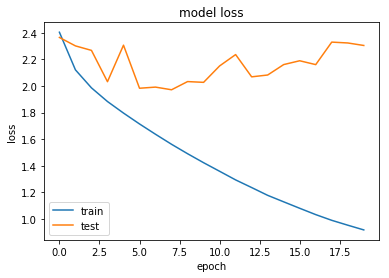

In [11]:
plt.figure()
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig("bn0.2.jpg")
plt.show()